# Run subset by time operation

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

**parameters of subset operation**

In [2]:
rooki.subset?

Signature:
rooki.subset(
    collection,
    pre_checked=False,
    apply_fixes=True,
    original_files=False,
    time=None,
    time_components=None,
    area=None,
    level=None,
)
Docstring:
Run subsetting on climate model data. Calls daops operators.

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiersExample: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
time : string
    The time interval (start/end) to subset over separated by '/' or a list of time points separated by ','. The format is according to the ISO-8601 standard. Example: 1860-01-01/1900-12-30 or 1860-01-01, 1870-01-01, 1880-01-01
time_components : string
    Optional time components to describe parts of the time period (e.g. year, month and day). Example: month:01,02,03 or year:1970,1980|month:01,02,03
area : string
    The area to subset over as 4 comma separated values.Example: 0.,49.,10.,65
level : string
    The level range to su

**data inventory**

https://github.com/cp4cds/c3s_34g_manifests/tree/master/inventories

using:
https://github.com/cp4cds/c3s_34g_manifests/blob/master/inventories/c3s-cmip6/c3s-cmip6_v20210126.yml

**run subset**

In [3]:
resp = rooki.subset(
    collection='c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619',
    time='2016-01-01/2016-12-30',
)
resp.ok

True

**show metalink output**

In [4]:
resp.url

'http://rook7.cloud.dkrz.de:80/outputs/rook/9acf3060-d80e-11ef-8c79-fa163eb671ca/input.meta4'

In [5]:
print(resp.xml)

<?xml version="1.0" encoding="UTF-8"?>
<metalink xmlns="urn:ietf:params:xml:ns:metalink">
    <published>2025-01-21T16:44:35Z</published>
    <generator>PyWPS/4.5.2</generator>

    <file name="tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20160101-20161230.nc">
        <identity>NetCDF file</identity>
        <size>18951905</size>
        <metaurl mediatype="application/x-netcdf">http://rook7.cloud.dkrz.de:80/outputs/rook/9d9dec78-d80e-11ef-87be-fa163eb671ca/tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20160101-20161230.nc</metaurl>
        <publisher name="None" url="http://rook7.cloud.dkrz.de:80/wps"/>
    </file>

</metalink>


**Size in MBytes**

In [6]:
resp.size_in_mb

18.07394504547119

**URLs in metalink document ...**

In [7]:
resp.download_urls()

['http://rook7.cloud.dkrz.de:80/outputs/rook/9d9dec78-d80e-11ef-87be-fa163eb671ca/tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20160101-20161230.nc']

**download files ...**

In [8]:
resp.download()

['/tmp/metalink_r3b75l6o/tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20160101-20161230.nc']

**... and open with xarray**

In [9]:
dsets = resp.datasets()


Already downloaded tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20160101-20161230.nc.


In [10]:
ds = dsets[0]
ds

<xarray.Dataset> Size: 31MB
Dimensions:    (time: 364, bnds: 2, lat: 120, lon: 180)
Coordinates:
  * time       (time) object 3kB 2016-01-01 12:00:00 ... 2016-12-30 12:00:00
  * lat        (lat) float64 960B -89.25 -87.75 -86.25 ... 86.25 87.75 89.25
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 6kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 31MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

In [11]:
ds.attrs

{'Conventions': 'CF-1.7 CMIP-6.2',
 'activity_id': 'ScenarioMIP',
 'branch_method': 'standard',
 'branch_time_in_child': np.float64(60225.0),
 'branch_time_in_parent': np.float64(60225.0),
 'contact': 'Evgeny Volodin (volodinev@gmail.com)',
 'creation_date': '2019-06-18T15:27:34Z',
 'data_specs_version': '01.00.29',
 'experiment': 'update of RCP4.5 based on SSP2',
 'experiment_id': 'ssp245',
 'external_variables': 'areacella',
 'forcing_index': np.int32(1),
 'frequency': 'day',
 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.INM.INM-CM5-0.ssp245.none.r1i1p1f1',
 'grid': 'gs2x1.5',
 'grid_label': 'gr1',
 'history': '2019-06-18T15:27:33Z ;rewrote data to be consistent with ScenarioMIP for variable clt found in table day.',
 'initialization_index': np.int32(1),
 'institution': 'Institute for Numerical Mathematics, Russian Academy of Science, Moscow 119991, Russia',
 'institution_id': 'INM',
 'mip_era': 'CMIP6',
 'nominal_resolution': '100 km',
 'parent_activity_id': 'CMIP',
 'p

**provenance**

In [12]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://rook7.cloud.dkrz.de:80/outputs/rook/9acf3060-d80e-11ef-8c79-fa163eb671ca/provenance.png'

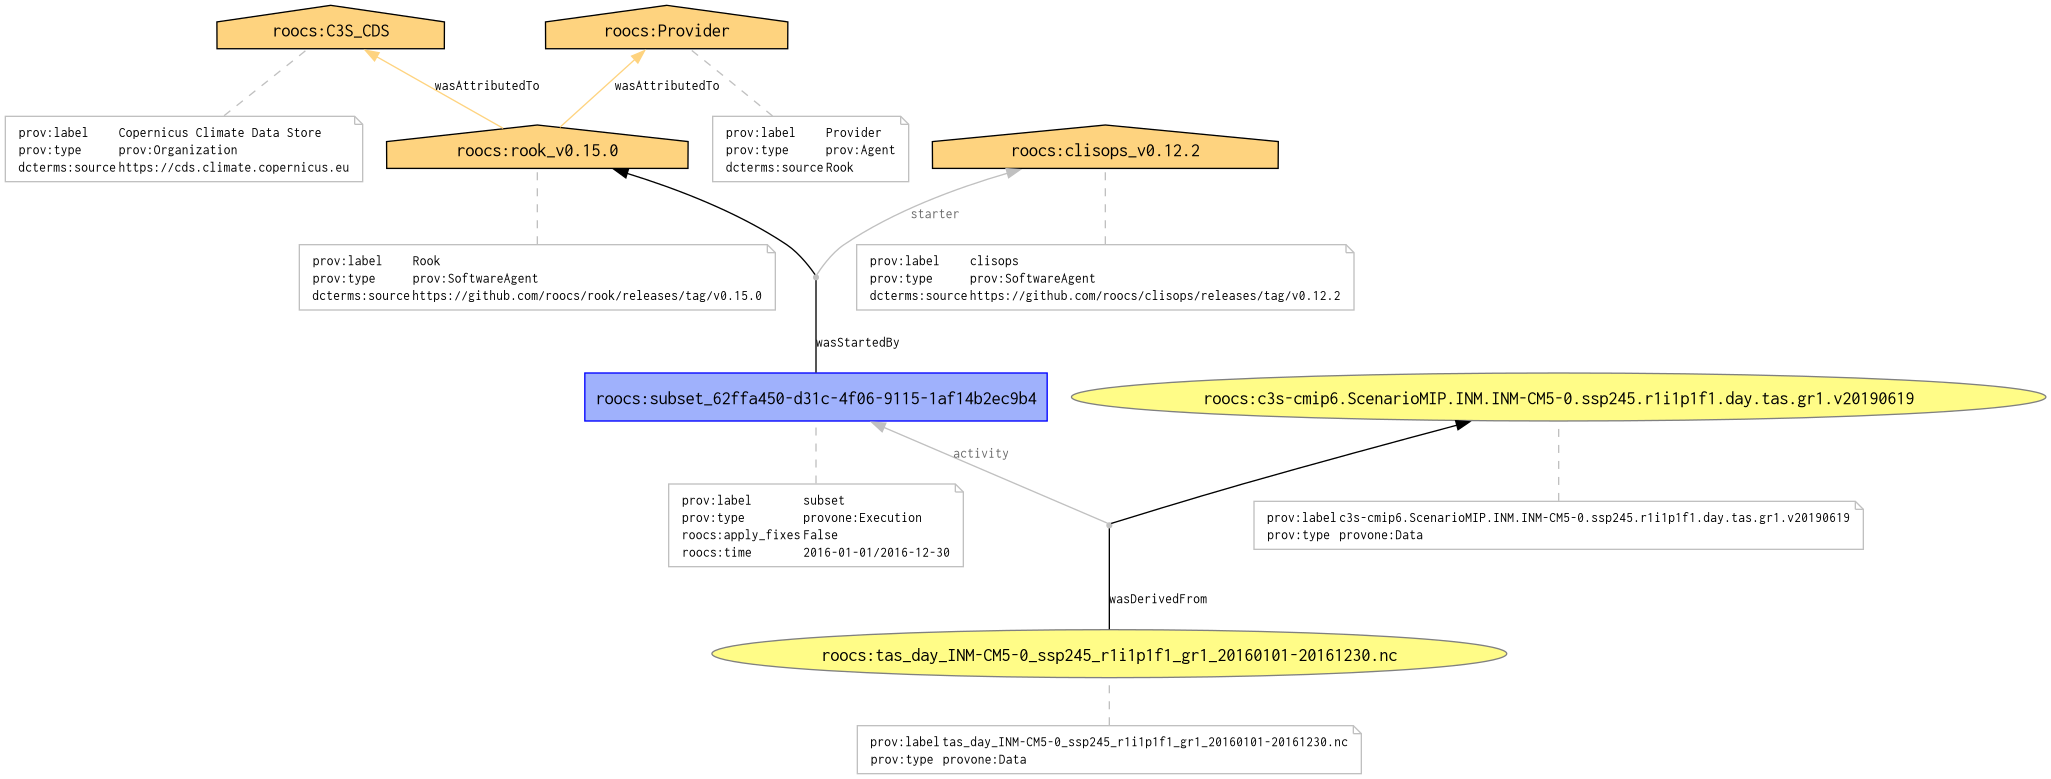

In [13]:
from IPython.display import Image
Image(prov_plot_url)